Population size 3000
Infected at t=0 7
[  7   8   9  10  12  14  17  19  23  26  30  35  41  47  54  62  72  82
  94 107 122 138 156 175 196 218 241 265 289 314 338 362 383 403 421 436
 448 456 461 463 462 457 450 440 428 414 399 382 365 347 329 311 293 275
 258 241 225 209 195 181 168 155 143 133 122 113 104  96  88  81  74  68
  63  58  53  48  44  41  37  34  31  28  26  24  22  20  18  17  15  14
  13  11  10   9   9   8   7   6   6   5   5   4   4   4   3   3   3   2
   2   2   2   1   1   1   1   1   1   1   1]


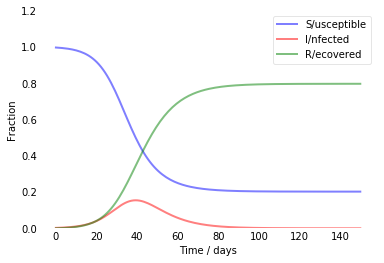

In [1]:
## Basic SIR model (adapted)
###### Jan Nagler (speak Sir Jan Nagler)
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# Population size
N = 3000

# Initial conditions: 1 Infected, no Recovered individuals
I0, R0 = 7, 0 #case zero

# All others, S=N-I-R susceptible, initially S0=N-I0-R0
S0 = N - I0 - R0 #normalization

# Contact rate, beta; recovery rate, gamma
beta, gamma = 0.3, 0.15

# Basic reproduction number R0 (speak R nought), average number of individuals that get infected over
# the period where an infected person is infectious at time 0 where no one is infected 
#R_nought = beta / gamma

print("Population size", N)
print("Infected at t=0", I0)
#print ("R0=",R_nought)

# A grid of time points (in days)
t = np.linspace(0, 150, 150)

# SIR model (coupled nonlinear system of ODEs)
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

#1/gamma avearge time to recover

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # return vector

#convert number of infected to integer
#data = I[0:50].astype(int)
data = I.astype(int)
data = np.trim_zeros(data) #remove all leading and trailing zeros from data
print(data) # display the infected individuals in numbers

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.set_xlabel('Time / days')
ax.set_ylabel('Fraction')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Population size 3000
Infected at t=0 7
[  7   8   9  10  12  14  17  19  23  26  30  35  41  47  54  62  72  82
  94 107 122 138 156 175 196 218 241 265 289 314 338 362 383 403 421 436
 448 456 461 463 462 457 450 440 428 414 399 382 365 347 329 311 293 275
 258 241 225 209 195 181 168 155 143 133 122 113 104  96  88  81  74  68
  63  58  53  48  44  41  37  34  31  28  26  24  22  20  18  17  15  14
  13  11  10   9   9   8   7   6   6   5   5   4   4   4   3   3   3   2
   2   2   2   1   1   1   1   1   1   1   1]


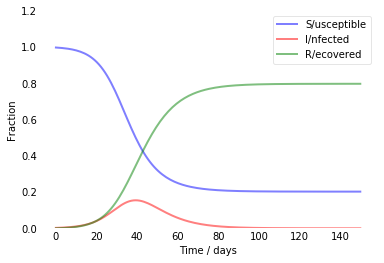

In [2]:
## Basic SIR model (adapted)
###### Jan Nagler (speak Sir Jan Nagler)
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# Population size
N = 3000

# Initial conditions: 1 Infected, no Recovered individuals
I0, R0 = 7, 0 #case zero

# All others, S=N-I-R susceptible, initially S0=N-I0-R0
S0 = N - I0 - R0 #normalization

# Contact rate, beta; recovery rate, gamma
beta, gamma = 0.3, 0.15

# Basic reproduction number R0 (speak R nought), average number of individuals that get infected over
# the period where an infected person is infectious at time 0 where no one is infected 
#R_nought = beta / gamma

print("Population size", N)
print("Infected at t=0", I0)
#print ("R0=",R_nought)

# A grid of time points (in days)
t = np.linspace(0, 150, 150)

# SIR model (coupled nonlinear system of ODEs)
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

#1/gamma avearge time to recover

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # return vector

#convert number of infected to integer
#data = I[0:50].astype(int)
data = I.astype(int)
data = np.trim_zeros(data) #remove all leading and trailing zeros from data
print(data) # display the infected individuals in numbers

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.set_xlabel('Time / days')
ax.set_ylabel('Fraction')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()